## Objective
As an independent musical artist, I've released 10 original songs over roughly the past 2 years that have spanned a wide variety of genres, including hip hop, acoustic singer-songwriter, and instrumental music. And I can feel the creative rut seeping in. There's [lots of resources](https://blog.landr.com/landr-select-musicians-guide-maximizing-creativity/) about how to break out of a creative rut, but I noticed one missing technique: data science-ing your way out of it (yes I just made that a verb).

All my music is on Spotify and neatly collected [into this playlist](https://open.spotify.com/user/12755201/playlist/3rAJyVWBR07cVCp2Cm3rYn?si=XHN_gQcKRyKxi1JCOE7kUQ). We can get some data on these tracks through the handy [spotipy](https://github.com/plamere/spotipy) library and also the excellent [Spotify for Artists](https://artists.spotify.com/) data portal.

In [1]:
import pandas as pd
import json
import spotipy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Collection

### Spotify API

In [4]:
# authenticate
import spotipy.util as util
token = util.prompt_for_user_token('12755201',
                           scope='playlist-read-private',
                           client_id='68d7a20a63ce47c38af4e5b145d12356',
                           client_secret='45b2097ff4514971b7e6c6db9e4d313e',
                           redirect_uri='http://localhost/')
if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("unable to auth for some reason")



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=68d7a20a63ce47c38af4e5b145d12356&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%2F&scope=playlist-read-private in your browser


Enter the URL you were redirected to: http://localhost/?code=AQCx3pADGIg3SpIN3VVn7s7ihqzaWQOZwXJO1rBI6Sew3-mblx6LeQlKfJY4kEUyCV1vrVqiXdbFdmUYJKvSLgonxtxyIT4g4QkRLfpl9-uLE-y4LPBjLXrpUeMPsj6La46hyjACsM_IIccZy4ILS6DDmx8mc8n6u2kM4Pl_4Nx_MvroTfPpBuKXSTYN_60SN0vFjJKYdWnBS6PGyM3NEA




In [5]:
# get all tracks in the playlist
uri = 'spotify:user:12755201:playlist:3rAJyVWBR07cVCp2Cm3rYn'
username = uri.split(':')[2]
playlist_id = uri.split(':')[4]
results = sp.user_playlist(username, playlist_id)

In [6]:
# clean up the track results from the Spotify API and put into a list
track_list = []
for track in results['tracks']['items']:
    # only include tracks where FYK is the artist
    if track['track']['artists'][0]['id'] == '7qMYIpuILKarjAQdkbigDS':
        track_list.append((track['track']['name'], track['track']['uri']))

In [7]:
# my discography!
track_list

[('Sunrise (Remix)', 'spotify:track:14EkEdN8AMuwu7PilsiyAq'),
 ('Church', 'spotify:track:0hzYt6deqYgyi7ibQE1cye'),
 ('Try 2 Hard', 'spotify:track:4OBiFgBSuiNj7vRIhNGWk0'),
 ('Sposed To Do', 'spotify:track:5YhJDsvPacYVY9UBGrif3n'),
 ('Road Rage', 'spotify:track:1kwCcTt3eno6Lb0soB4FfA'),
 ("Blowin' in the Wind", 'spotify:track:2FaqoUUuIPti2ZpawnmDKG'),
 ('Leave (Get Out)', 'spotify:track:1XVDb7yy0wEsdLXON9kqD8'),
 ('Sunrise (Acoustic)', 'spotify:track:6QvdCtego9AYqrgl0J6dU5'),
 ('Fine Art', 'spotify:track:3grkRDZIxLYlPZknxOSphM'),
 ('Triple Major', 'spotify:track:1GEiPRqO7yicpHIAWXmVcP')]

In [8]:
names, tids = zip(*track_list)

In [9]:
features = sp.audio_features(tids)

In [10]:
df = pd.DataFrame({'track_name': names, 
                   'track_uri': tids,
                   'danceability': list(map(lambda r: r['danceability'], features)),
                   'energy': list(map(lambda r: r['energy'], features)),
                   'speechiness': list(map(lambda r: r['speechiness'], features)),
                   'acousticness': list(map(lambda r: r['acousticness'], features)),
                   'instrumentalness': list(map(lambda r: r['instrumentalness'], features)),
                   'valence': list(map(lambda r: r['valence'], features)),
                   'tempo': list(map(lambda r: r['tempo'], features))
                  })

In [11]:
df

,track_name,track_uri,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo
0,Sunrise (Remix),spotify:track:14EkEdN8AMuwu7PilsiyAq,0.542,0.666,0.1840,0.0790,0.000000,0.0808,89.427
1,Church,spotify:track:0hzYt6deqYgyi7ibQE1cye,0.598,0.440,0.0344,0.0484,0.821000,0.7800,79.994
2,Try 2 Hard,spotify:track:4OBiFgBSuiNj7vRIhNGWk0,0.371,0.696,0.0885,0.7150,0.000080,0.3500,84.140
3,Sposed To Do,spotify:track:5YhJDsvPacYVY9UBGrif3n,0.765,0.490,0.0473,0.2520,0.003890,0.2470,87.031
4,Road Rage,spotify:track:1kwCcTt3eno6Lb0soB4FfA,0.938,0.451,0.2630,0.0647,0.000000,0.5980,100.028
5,Blowin' in the Wind,spotify:track:2FaqoUUuIPti2ZpawnmDKG,0.499,0.181,0.0394,0.9560,0.000053,0.4370,120.546
6,Leave (Get Out),spotify:track:1XVDb7yy0wEsdLXON9kqD8,0.716,0.328,0.0595,0.5320,0.000000,0.6690,84.792
7,Sunrise (Acoustic),spotify:track:6QvdCtego9AYqrgl0J6dU5,0.692,0.170,0.0822,0.7210,0.000000,0.5020,90.032
8,Fine Art,spotify:track:3grkRDZIxLYlPZknxOSphM,0.552,0.643,0.0880,0.0958,0.000000,0.5800,86.920
9,Triple Major,spotify:track:1GEiPRqO7yicpHIAWXmVcP,0.715,0.686,0.0812,0.0153,0.000000,0.7460,170.103


### S4A

In [12]:
!pwd

/Users/kennethning/repos/blog_posts/notebooks


In [13]:
df_s4a = pd.read_csv("../data/recordings-since2015.csv")

In [14]:
df_full = df.merge(df_s4a, left_on='track_name', right_on='song')

In [15]:
df_full['save_ratio'] = df_full['saves'] / df_full['listeners']

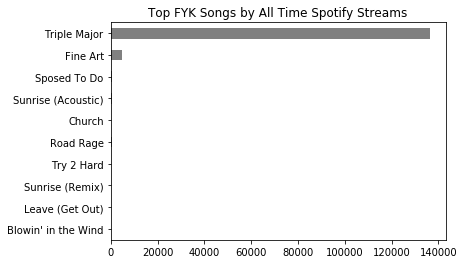

In [16]:
df_full.set_index('track_name').sort_values('listeners')['streams'].plot(kind='barh', color='gray', title="Top FYK Songs by All Time Spotify Streams")
plt.ylabel('')
plt.savefig("../plots/fyk_top_tracks.png")

In [17]:
df_full[['listeners','streams']].describe()

,listeners,streams
count,10.000000,10.000000
mean,4919.600000,14334.300000
std,14735.161826,42856.054783
min,6.000000,11.000000
25%,73.750000,139.500000
50%,160.500000,331.500000
75%,197.250000,605.250000
max,46839.000000,136234.000000


We can quickly see that the consumption of my music is very skewed. In particular, there is one track, Triple Major, that has 46,839 all time listeners and >100K streams. For comparison, my median track has 160 all time listeners and 331 all time streams. 

I'd love to take full credit for the success of that track, but the real reason behind its success is [Kpop](https://open.spotify.com/user/121489479/playlist/6Jx7wvYVlwWFANaBDe7qOk?si=Pd4rtZ-TRVy_LPrcYnCpJQ). That's right, I got picked up by tastemaker, Christina Choi, and she placed that song in her playlist and I had a lot of downstream consumption afterwards attributable to that placement. (side note: I'm not actually Korean, but who's counting??). In the graph below, you can see the big spike as a result of that placement and the long tail downstream consumption that followed.

<img src="triple_major.png">

The ride didn't end there. This consumption actually bootstrapped itself straight into Discover Weekly and I was coasting off that for a while. Now the heat has died down a bit and it's been a challenge to repeat that success. The power of playlisting is real.

Now the big question... what should my next musical project sound like? Of the music I've released so far, is there any correlation between certain audio attributes and "success" of the song.

For audio attributes, it's fairly easy to get that from the Spotify API. "Success" is always tricky to define when it comes to music performance. Streams or listeners is out of the question since the distribution is skewed. Instead, we'll look at save ratio, or saves divided by listeners, as a way to measure how engaged listeners of the track were.

In [18]:
# filter out songs with less than 50 listeners
df_filtered = df_full.query("listeners > 50")

In [19]:
top_tracks = df_filtered.sort_values('save_ratio')

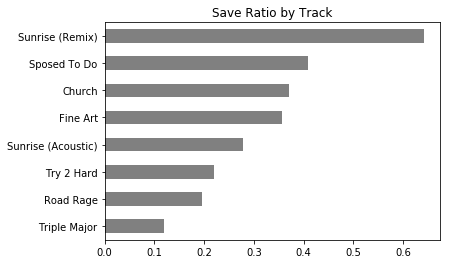

In [20]:
top_tracks.set_index('track_name')['save_ratio'].plot(kind='barh', color='gray', title="Save Ratio by Track")
plt.ylabel('')
plt.savefig("../plots/save_ratio_by_track.png", bbox_inches='tight')

In [21]:
top_tracks.sort_values("save_ratio", ascending=False)

,track_name,track_uri,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo,song,listeners,streams,saves,release_date,save_ratio
0,Sunrise (Remix),spotify:track:14EkEdN8AMuwu7PilsiyAq,0.542,0.666,0.1840,0.0790,0.00000,0.0808,89.427,Sunrise (Remix),53,109,34,2018-09-06,0.641509
3,Sposed To Do,spotify:track:5YhJDsvPacYVY9UBGrif3n,0.765,0.490,0.0473,0.2520,0.00389,0.2470,87.031,Sposed To Do,208,611,85,2018-05-25,0.408654
1,Church,spotify:track:0hzYt6deqYgyi7ibQE1cye,0.598,0.440,0.0344,0.0484,0.82100,0.7800,79.994,Church,162,255,60,2018-06-10,0.370370
8,Fine Art,spotify:track:3grkRDZIxLYlPZknxOSphM,0.552,0.643,0.0880,0.0958,0.00000,0.5800,86.920,Fine Art,1454,4876,518,2017-02-17,0.356259
7,Sunrise (Acoustic),spotify:track:6QvdCtego9AYqrgl0J6dU5,0.692,0.170,0.0822,0.7210,0.00000,0.5020,90.032,Sunrise (Acoustic),165,588,46,2018-09-06,0.278788
2,Try 2 Hard,spotify:track:4OBiFgBSuiNj7vRIhNGWk0,0.371,0.696,0.0885,0.7150,0.00008,0.3500,84.140,Try 2 Hard,136,231,30,2018-05-25,0.220588
4,Road Rage,spotify:track:1kwCcTt3eno6Lb0soB4FfA,0.938,0.451,0.2630,0.0647,0.00000,0.5980,100.028,Road Rage,159,408,31,2018-01-30,0.194969
9,Triple Major,spotify:track:1GEiPRqO7yicpHIAWXmVcP,0.715,0.686,0.0812,0.0153,0.00000,0.7460,170.103,Triple Major,46839,136234,5554,2017-02-17,0.118576


Interesting to see that Sunrise (Remix) has the best save ratio. It also happens to my favorite song of the bunch and most recent release, so that's promising! Rounding out the top is Sposed To Do, which got a little bit of a boost through a Spotify Ad Studio ad I ran with it and Church, which also got a bit of a boost through a corresponding Instagram ad I released around the same time. It's clear that even small promotional actions like Facebook/Instagram ads can actually make some impact onto the performance of your song.

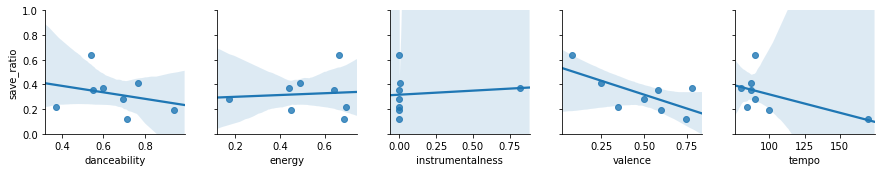

In [22]:
sns.pairplot(df_filtered, 
             kind='reg',
             x_vars=["danceability", "energy", "instrumentalness", "valence", "tempo"],
             y_vars=["save_ratio"]
             )
plt.ylim(0,1)
plt.savefig("../plots/fyk_pairplot.png")

As far as audio attributes go, the only mild correlation here is for valence, which Spotify's website roughly equates to the mood of the song. Valence [roughly maps to the mood of the song](https://insights.spotify.com/us/2013/11/05/musics-emotion-over-time/), so lower valence is sadder and higher valence is happier. Guess I should make "darker" sounding music.

## Herbie Hancock
Let's take this idea - data science-ing your way to musical understanding - and apply it to an artist with a long and diverse musical career: Herbie Hancock. 

### Who is Herbie Hancock?
Herbie's musical career has spanned over five decades, starting off as a premier jazz piano player for Miles Davis and Wayne Shorter, to funking it up in the late 70s and 80s, to film scoring, to hip hop, and to one of the few grammy Album of the Year awards with 2007's "The Joni Mitchell Letters". His musical chameleon is still in full force, as his next album is rumored to feature contemporary hip hop royalty such as Kendrick Lamar, Snoop Dogg, and Terrace Martin.

Let's see what Spotify's API can tell us about Herbie's prodigious career.

### Getting the data

In [23]:
# get all albums for for Herbie Hancock
results = sp.artist_albums('spotify:artist:2ZvrvbQNrHKwjT7qfGFFUW', 
                           album_type='album',
                           limit=50)

results2 = sp.artist_albums('spotify:artist:2ZvrvbQNrHKwjT7qfGFFUW', 
                           album_type='album',
                           limit=50, 
                           offset=50)

In [24]:
disco = pd.DataFrame(results['items'] + results2['items'])

# drop some duplicate albums
disco.drop_duplicates(subset='name', inplace=True)
disco.shape

(54, 14)

In [25]:
disco.head()

,album_group,album_type,artists,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri
0,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",{'spotify': 'https://open.spotify.com/album/2j...,https://api.spotify.com/v1/albums/2j7LHh4IcOyD...,2j7LHh4IcOyD5AQZZVZgjc,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Monster (Expanded Edition),2016-06-17,day,12,album,spotify:album:2j7LHh4IcOyD5AQZZVZgjc
1,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",{'spotify': 'https://open.spotify.com/album/6U...,https://api.spotify.com/v1/albums/6UlYBgWI5GaH...,6UlYBgWI5GaHuBwBmdSvPy,"[{'height': 600, 'url': 'https://i.scdn.co/ima...",Now Playing Herbie Hancock,2016-04-22,day,50,album,spotify:album:6UlYBgWI5GaHuBwBmdSvPy
2,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",{'spotify': 'https://open.spotify.com/album/1W...,https://api.spotify.com/v1/albums/1WacHRxZ1QHM...,1WacHRxZ1QHMzRZ2WH96gt,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",The Imagine Project,2010-06-21,day,10,album,spotify:album:1WacHRxZ1QHMzRZ2WH96gt
4,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",{'spotify': 'https://open.spotify.com/album/4S...,https://api.spotify.com/v1/albums/4S4pN2riMj55...,4S4pN2riMj555wnu08q0Bw,"[{'height': 637, 'url': 'https://i.scdn.co/ima...",Les Incontournables du jazz : Herbie Hancock,2007-11-01,day,5,album,spotify:album:4S4pN2riMj555wnu08q0Bw
5,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",{'spotify': 'https://open.spotify.com/album/3P...,https://api.spotify.com/v1/albums/3POVQYTvE1DY...,3POVQYTvE1DYjlLWulZpTR,"[{'height': 634, 'url': 'https://i.scdn.co/ima...",River: The Joni Letters (Expanded Edition),2007-09-25,day,14,album,spotify:album:3POVQYTvE1DYjlLWulZpTR


Getting audio attributes for these albums is trickier because audio attributes are only calculated at the track level in the Spotify API. Ideally we want these attributes at the album level, since this is the level of detail with which we should be thinking about Herbie's work. To estimate audio attribues at the album level, we will simply take the mean value per audio attribute across all the tracks within the album.

In [26]:
# for a given album, get audio attributes for each track and return a df with the mean values
def get_album_audio(uri):
    tracks = sp.album_tracks(uri)
    tracks_df = pd.DataFrame(tracks['items'])
    audio_results = sp.audio_features(tracks_df.uri)
    
    audio_df = pd.DataFrame(audio_results)
    audio_aggregate = audio_df.mean().to_frame().unstack().unstack()
    return audio_aggregate

In [27]:
# for a given album, get its popularity and list of genres
def get_album_popularity(uri):
    album = sp.album(uri)
    popularity = album['popularity']
    genres = album['genres']
    album_df = pd.DataFrame({"popularity": [popularity], "genres": [genres]})
    return album_df

In [28]:
# loop through all album URIs, get the average audio attributes by track for those albums and popularity and return a new df
album_data = pd.DataFrame({})
for uri in disco.uri:
    audio = get_album_audio(uri)
    pop = get_album_popularity(uri)
    df_merge = audio.merge(pop, how='outer', left_index=True, right_index=True)
    df_merge['uri'] = uri
    
    album_data = pd.concat([album_data, df_merge])

In [29]:
album_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,genres,uri
0,0.037471,0.715083,377647.666667,0.716000,0.069980,6.250000,0.141125,-10.423167,0.500000,0.046708,115.126750,4.000000,0.870167,36,[],spotify:album:2j7LHh4IcOyD5AQZZVZgjc
0,0.679917,0.486440,368550.420000,0.314158,0.467971,4.640000,0.205846,-15.295880,0.660000,0.047074,107.326500,3.860000,0.356914,40,[],spotify:album:6UlYBgWI5GaHuBwBmdSvPy
0,0.448961,0.545500,395815.900000,0.608600,0.069291,3.400000,0.167730,-9.654500,0.700000,0.040760,125.087700,3.700000,0.435000,27,[],spotify:album:1WacHRxZ1QHMzRZ2WH96gt
0,0.667200,0.390600,460389.200000,0.410160,0.544600,4.000000,0.165820,-15.961200,0.000000,0.042120,128.615800,3.800000,0.398800,10,[],spotify:album:4S4pN2riMj555wnu08q0Bw
0,0.870000,0.488143,413924.857143,0.257036,0.197736,5.714286,0.116014,-13.862214,0.785714,0.038786,120.038571,3.642857,0.258500,25,[],spotify:album:3POVQYTvE1DYjlLWulZpTR


In [30]:
disco_full = disco.merge(album_data, on='uri')
disco_full.set_index(pd.to_datetime(disco_full.release_date), inplace=True)
disco_full.head()

,album_group,album_type,artists,available_markets,external_urls,href,id,images,name,release_date,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,genres
release_date,,,,,,,,,,,,,,,,,,,,,
2016-06-17,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",{'spotify': 'https://open.spotify.com/album/2j...,https://api.spotify.com/v1/albums/2j7LHh4IcOyD...,2j7LHh4IcOyD5AQZZVZgjc,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Monster (Expanded Edition),2016-06-17,...,6.250000,0.141125,-10.423167,0.500000,0.046708,115.126750,4.000000,0.870167,36,[]
2016-04-22,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",{'spotify': 'https://open.spotify.com/album/6U...,https://api.spotify.com/v1/albums/6UlYBgWI5GaH...,6UlYBgWI5GaHuBwBmdSvPy,"[{'height': 600, 'url': 'https://i.scdn.co/ima...",Now Playing Herbie Hancock,2016-04-22,...,4.640000,0.205846,-15.295880,0.660000,0.047074,107.326500,3.860000,0.356914,40,[]
2010-06-21,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",{'spotify': 'https://open.spotify.com/album/1W...,https://api.spotify.com/v1/albums/1WacHRxZ1QHM...,1WacHRxZ1QHMzRZ2WH96gt,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",The Imagine Project,2010-06-21,...,3.400000,0.167730,-9.654500,0.700000,0.040760,125.087700,3.700000,0.435000,27,[]
2007-11-01,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",{'spotify': 'https://open.spotify.com/album/4S...,https://api.spotify.com/v1/albums/4S4pN2riMj55...,4S4pN2riMj555wnu08q0Bw,"[{'height': 637, 'url': 'https://i.scdn.co/ima...",Les Incontournables du jazz : Herbie Hancock,2007-11-01,...,4.000000,0.165820,-15.961200,0.000000,0.042120,128.615800,3.800000,0.398800,10,[]
2007-09-25,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",{'spotify': 'https://open.spotify.com/album/3P...,https://api.spotify.com/v1/albums/3POVQYTvE1DY...,3POVQYTvE1DYjlLWulZpTR,"[{'height': 634, 'url': 'https://i.scdn.co/ima...",River: The Joni Letters (Expanded Edition),2007-09-25,...,5.714286,0.116014,-13.862214,0.785714,0.038786,120.038571,3.642857,0.258500,25,[]


### How prolific is he?

His debut album, "Takin' Off" was released in 1962. He's averaged 1 album release every year since then, no small feat for a career lasting 5 decades, totaling 54 albums on Spotify (though granted some of these are compilations). By the time Herbie Hancock was 25, he would've released two of the most seminal jazz albums of all time (Maiden Voyage, Empyrean Isles), sidemanned on Wayne Shorter's classic, "Speak No Evil", and would be in the heat of Miles Davis's Second Great Quintet. Makes me wonder what the f*** I've been spending my time doing. 

The remarkable thing about Herbie Hancock is his ability to adapt his style over time. Let's take a look at his releases over time.

In [31]:
disco_full.resample("AS").size().loc[:'2010'].mean()

1.0612244897959184

In [32]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y')

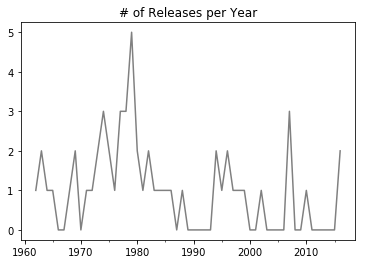

In [33]:
fig = disco_full.resample("AS").size().plot(kind='line', color='gray', title='# of Releases per Year')
plt.xlabel('')
plt.savefig('../plots/releases.png')


In [34]:
disco_full.resample("5AS").size().index

DatetimeIndex(['1962-01-01', '1967-01-01', '1972-01-01', '1977-01-01',
               '1982-01-01', '1987-01-01', '1992-01-01', '1997-01-01',
               '2002-01-01', '2007-01-01', '2012-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='release_date', freq=None)

He was most prolific between 1977 and 1982 (14 albums in a 5 year period). At this point in Herbie's career, he started expanding beyond his signature modal style into electronic/funk sounds. This part of his career gave us classics like Sunlight (1978).

In [37]:
disco_full.resample("AS").mean().danceability.fillna(method='ffill').head()

release_date
1962-01-01    0.529111
1963-01-01    0.546750
1964-01-01    0.473500
1965-01-01    0.429400
1966-01-01    0.429400
Freq: AS-JAN, Name: danceability, dtype: float64

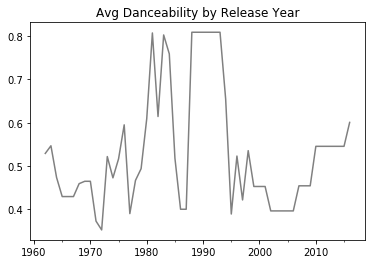

In [38]:
disco_full.resample("AS").mean().danceability.fillna(method='ffill').plot(kind='line',color='grey', title='Avg Danceability by Release Year')
plt.xlabel('')
plt.savefig('../plots/danceability.png')

We can see danceability start to tick up for Herbie Hancok post-1982. It was around this time that Herbie released what many critics call the first jazz-hip hop record, "Rockit" on his 1983 album, Future Shock. This era seems to have peaked and ended with his 1988 release, Perfect Machine, the last of the Rockit band series.

This naturally begs the same question I was asking of my own music... are certain audio attributes more or less predictive of success?

Unfortunately, I can't get save ratio data for Herbie's music through the Spotify API, but I can get something called "popularity" score. Popularity score is a normalized metric from 0-100 (0 being "least popular", 100 being "most popular") that is a weighted sum of streams, biasing more recent streams over older streams. By weighting recent streams more heavily, it is designed to surface newer, hotter tracks instead of evergreen, catalog tracks (hence the name "popularity"). It is the metric that Spotify uses to rank the "Popular" tracks carousel on every artist's page. It is the NOT the same as all-time streams, but for some reason Spotify decides to rank by popularity but *visualize* all time streams, which is a mad confusing user experience in my opinion.

To give you a taste of how popularity works, here are Herbie Hancock's most popular albums.

In [39]:
disco_full.sort_values('popularity', ascending=False).set_index('name')['popularity'].head()

name
Empyrean Isles                          54
Head Hunters                            51
Maiden Voyage                           50
Cantaloupe Island                       46
Takin' Off (Rudy Van Gelder Edition)    45
Name: popularity, dtype: int64

I'm surprised to see Empyrean Isles over Head Hunters. Empyrean Isles has that frikkin all star Miles Davis rhythm section (Tony Williams X Ron Carter) plus trumpet legend Freddie Hubbard. Not the most approachable album honestly for casual jazz listeners, but I'd be willing to bet that the Cantaloupe Island recording on this record (debut recording for what is arguably his most famous composition) is programmed a lot on Spotify jazz playlists. In fact, you can see that the biggest playlist Herbie is on is "Good Morning Jazz" and lo and behold, there's Cantaloupe Island from Empyrean Isles.

So popularity isn't perfect since it's clearly still susceptible to programming. Theoretically, it would also weight Herbie's newer catalog higher, but considering Herbie Hancock hasn't released in a while, this shouldn't be a huge confounding factor.

Similar to the graph we did above, let's look at the relationship between all the Spotify audio attributes and popularity for each Herbie album.

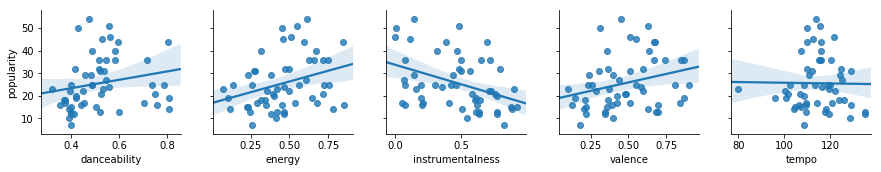

In [35]:
sns.pairplot(data=disco_full, 
             kind='reg',
             x_vars=["danceability", "energy","instrumentalness", "valence", "tempo"],
             y_vars=["popularity"]
             )
plt.savefig("herbie_audio_corr.png")

There seem to be mild, positive correlations for more danceable, higher energy, and higher valence Herbie music. This isn't that surprising since popular music generally tends to be higher energy. 

Instrumentalness has a mild negative correlation with popularity. Anecdotally, I seem to find that most people don't like purely instrumental music and appreciate a little bit of vocals in the music. This effect seems to apply to Herbie as well.

What does this mean for Herbie Hancock? I think it bodes well for his next project, which is being produced by hip hop super-producer, Terrace Martin and featuring contemporary jazz/hip hop royalty like Kendrick Lamar, Thundercat, and Snoop Dogg. A high energy album featuring vocalists? Somebody on Herbie's team either has great intuition or has done this same analysis (I think I know which one it'd be...).

### For real though, data-informed artist development?

Technology has made a lot of jobs in the music industry easier. One of them I think is discovering new talent. We're in the golden age of music recommendations, and it's not uncommon for regular people to discover a new favorite artist every week. I've love to see a curve plotting the growth of new A&R signees that were discovered through products like Discover Weekly.

Finding talent is easy, but developing that talent into a career artist is difficult. This is where I think there is a lot of opportunity to use data to help understand historically what creative decisions worked and didn't work. The great thing is that so much of this information is publicly available to anybody. Even if you're an independent artist, you have access to more information than you think. While it helps to have some data chops, I don't think it takes a scientist to approach your music creation process with a critical eye. I've seen artist managers start to extend their data skills quite a bit, but I think it's time for us artists to step up the game as well.